<a href="https://colab.research.google.com/github/AbdulsemedShalo/Gute-Project/blob/main/FinaleOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are 50598 rows and 78 columns for training dataframe
There are 35056 rows and 78 columns for testing dataframe


<ipython-input-2-5522c028bbbb>:61: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-2-5522c028bbbb>:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


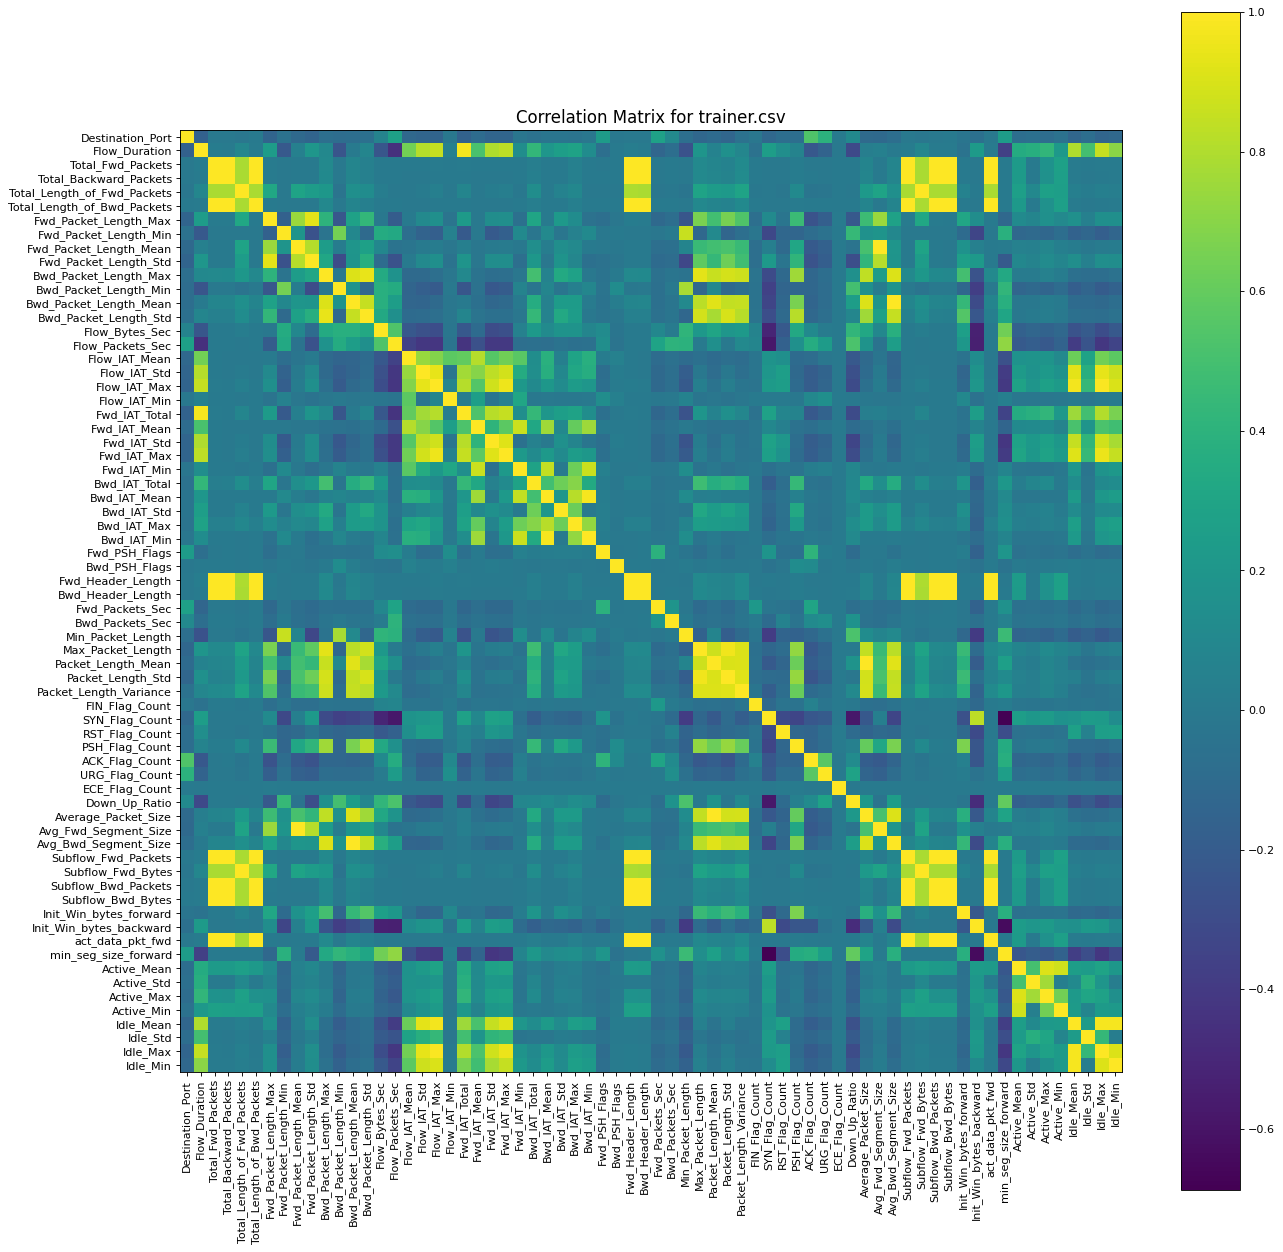

<ipython-input-2-5522c028bbbb>:61: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
<ipython-input-2-5522c028bbbb>:66: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


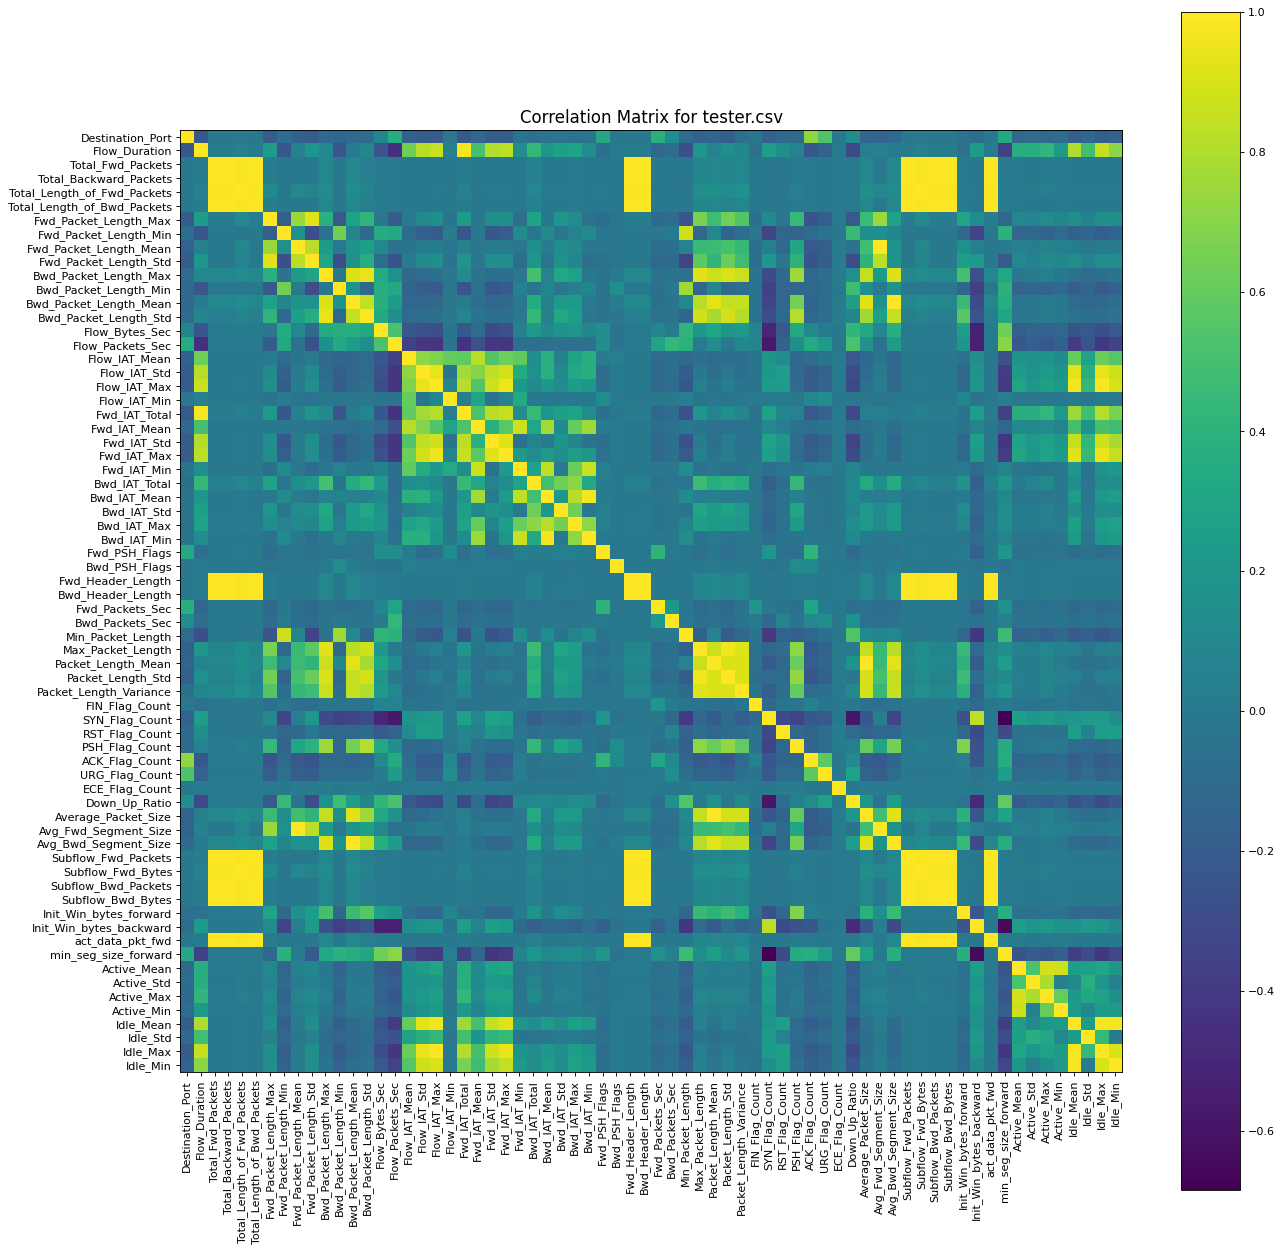

<ipython-input-2-5522c028bbbb>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


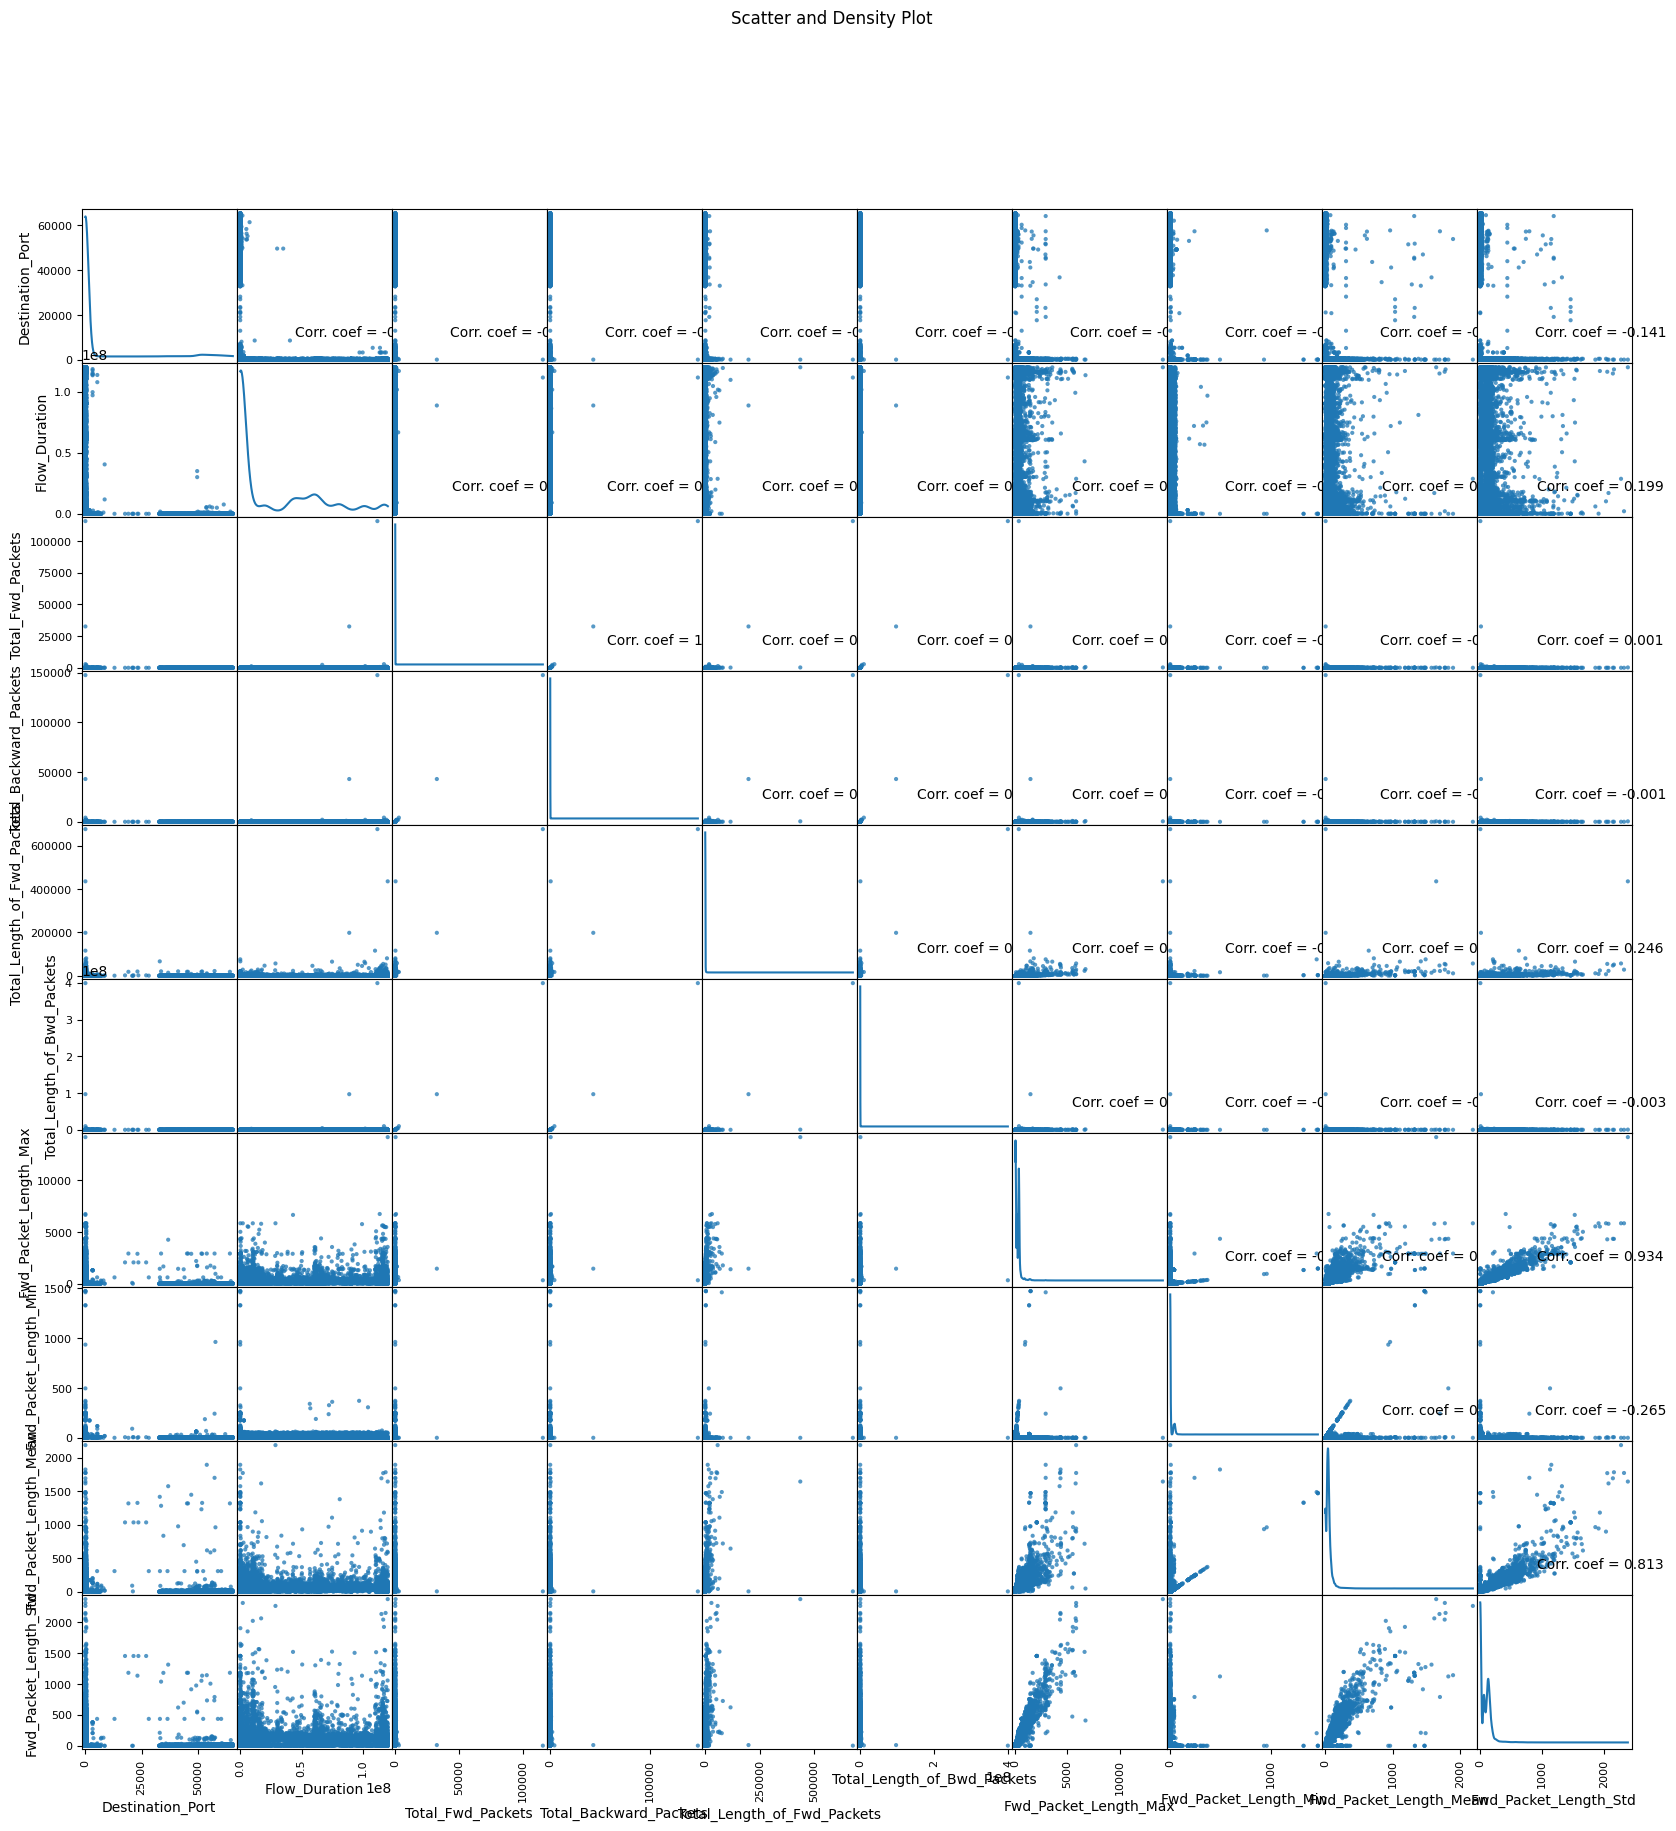

<ipython-input-2-5522c028bbbb>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


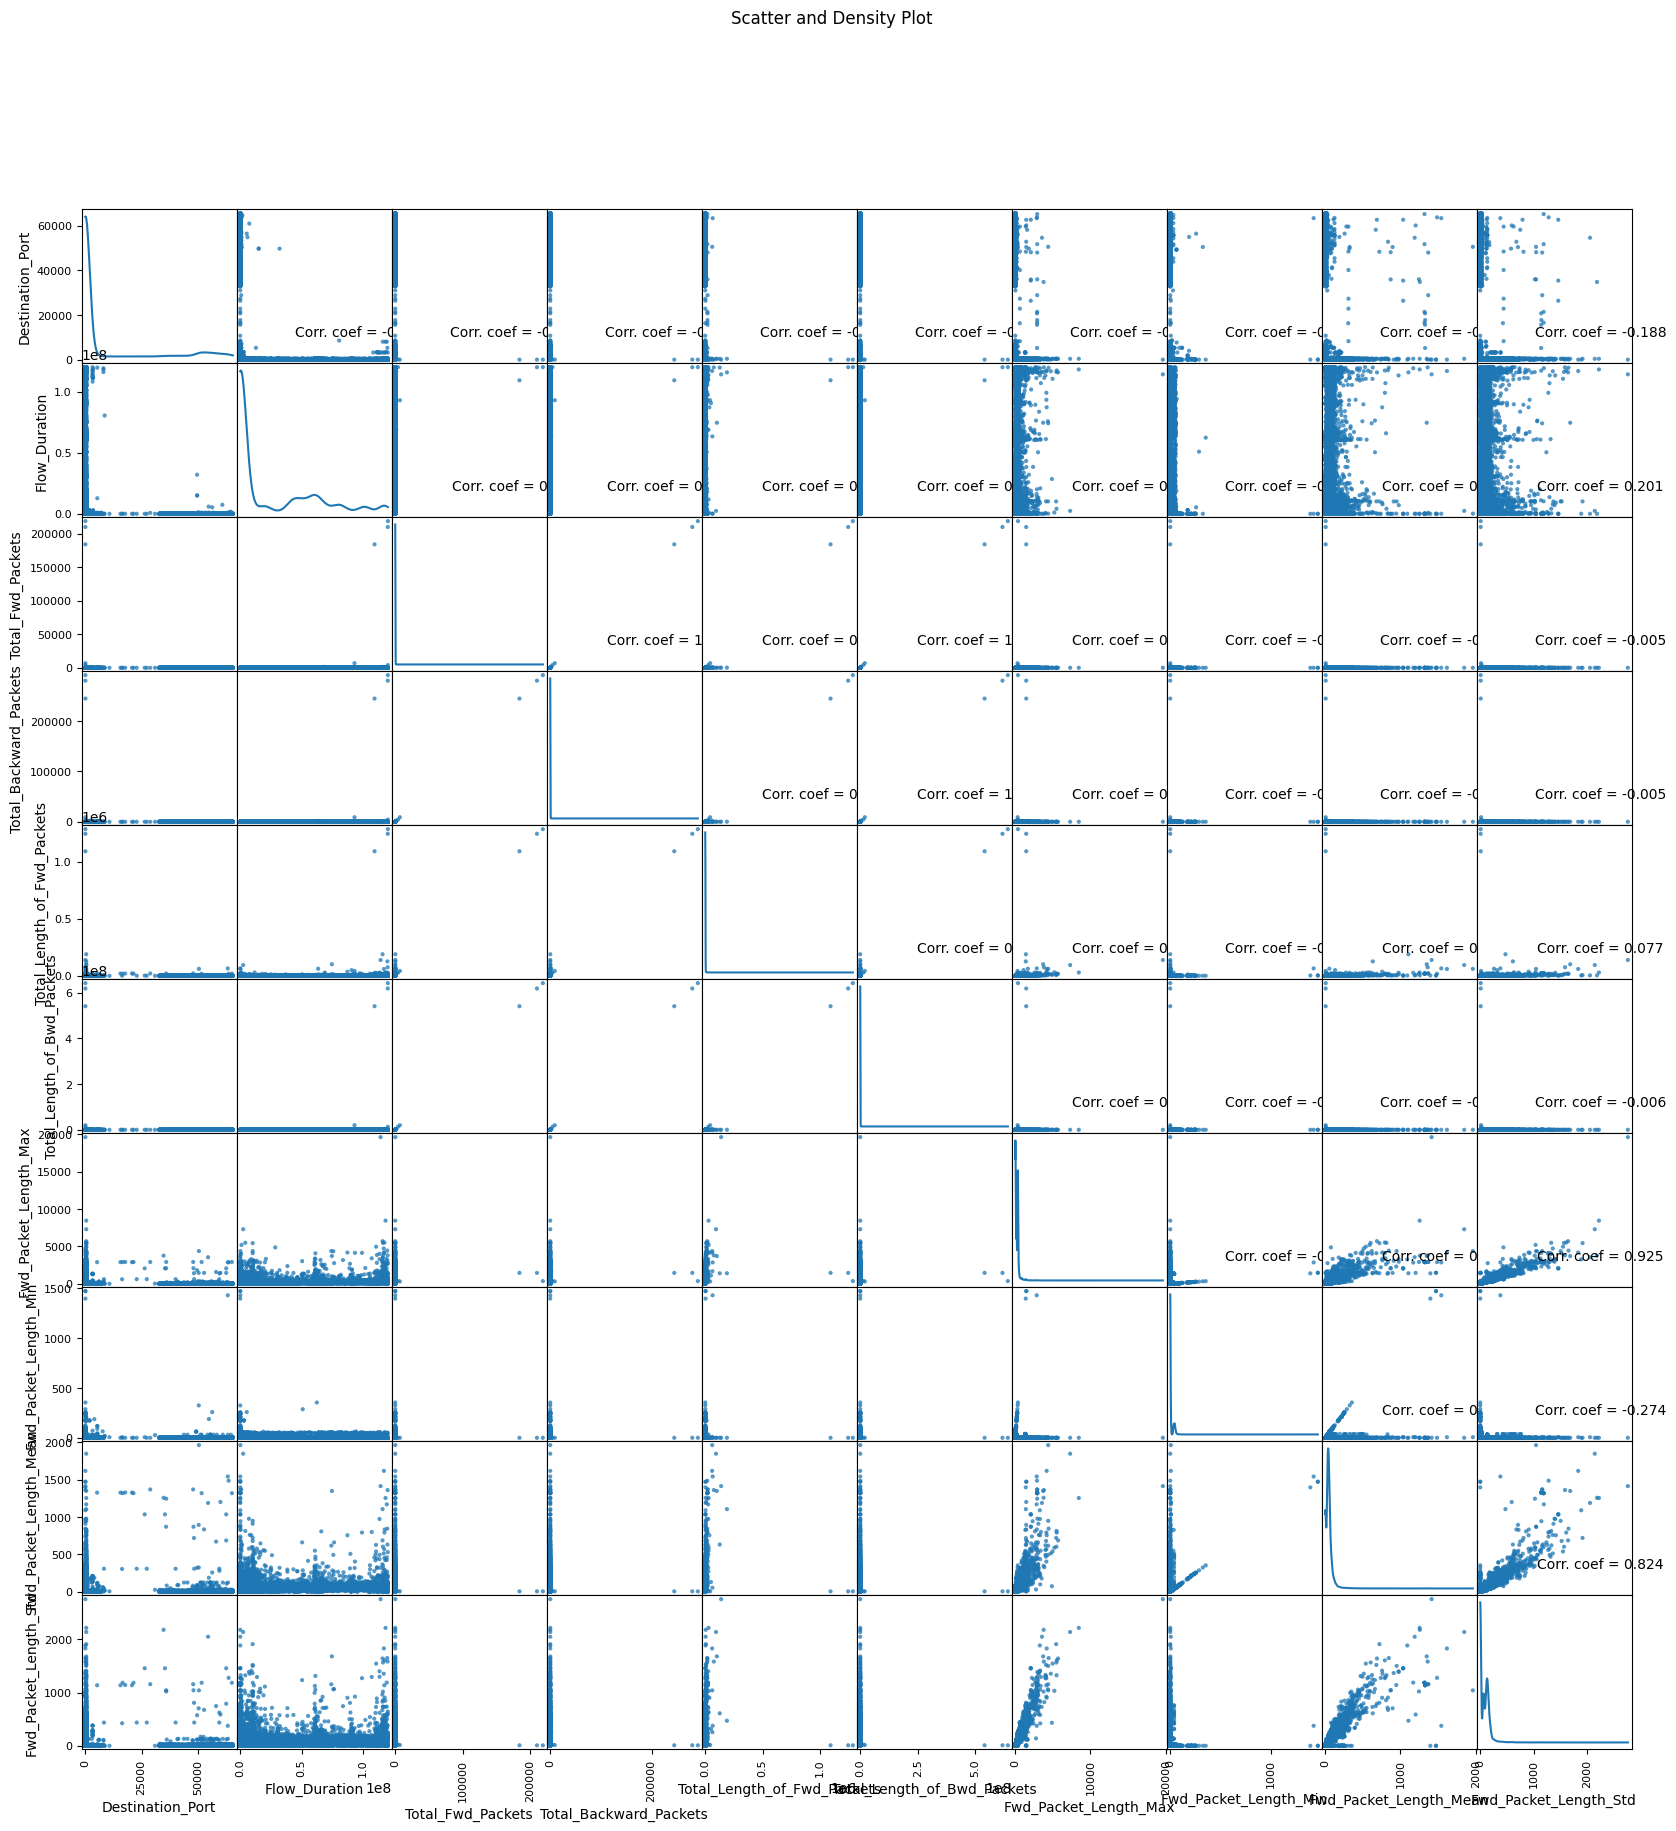

Naive Bayes's Accuracy :  0.9492811501597445
Decision Tree Classiffier Accuracy: 0.9998003194888179
Decision Tree with Max Depth Accuracy: 0.9966054313099042
K-Nearest Neighbour Accuracy: 0.9874201277955271


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression algorithm Accuracy: 0.921240301232314
SVM Accuracy: 0.7854005020538567


In [2]:
from google.colab import files
import matplotlib.pyplot as plt # plotting
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB #import gaussian naive bayes model
from sklearn.tree import DecisionTreeClassifier #import Decision tree classifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
import numpy as np


# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 

    # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)

    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# to check the number of rows we want to read for a preview
nRowsRead = None

# the path for a testing dataframe 
file_path_test="/content/tester.csv"

# the path for a training dataframe
file_path_train="/content/trainer.csv"


df_trainer = pd.read_csv(file_path_train,nrows = nRowsRead)
df_tester = pd.read_csv(file_path_test,nrows = nRowsRead)
# describing both the test and train dataframes


df_trainer.dataframeName = 'trainer.csv'
df_tester.dataframeName =  'tester.csv'

nRowsNum, nCol = df_trainer.shape
nRowsNum2, nCol2 = df_tester.shape

print(f'There are {nRowsNum} rows and {nCol} columns for training dataframe')
print(f'There are {nRowsNum2} rows and {nCol2} columns for testing dataframe')
#print(df_trainer.head(5))

#plotPerColumnDistribution(df_trainer,10,5)
plotCorrelationMatrix(df_trainer,19)

plotCorrelationMatrix(df_tester,19)

plotScatterMatrix(df_trainer, 20, 10)

plotScatterMatrix(df_tester, 20, 10)

#df_tester.head()


# array(['BENIGN', 'DoS slowloris', 'DoS Hulk'], dtype=object)
df_trainer['Label'].unique()
df_tester['Label'].unique()

# Encode the string classes to numeric to perform further processes.
label_encoder = preprocessing.LabelEncoder()
df_trainer['Label'] = label_encoder.fit_transform(df_trainer['Label'])
df_tester['Label'] = label_encoder.fit_transform(df_tester['Label'])


# split the data into train data and test data. As convention in machine learning, X_train,X_test are used for features and y_train,y_test are used for classes.
X_train = df_trainer.drop('Label',axis=1)
X_test = df_tester.drop('Label',axis=1)
y_train = df_trainer['Label']
y_test = df_tester['Label']

# checking  train data
X_train.head()
y_train.head()


# checking  test data
X_test.head()
y_test.head()


# Accuracy test for Naive Baye's Algorithm

# create gaussian naive bayes classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train,y_train)
#Predict the response for test dataset
gnb_pred = gnb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Naive Bayes's Accuracy : ",metrics.accuracy_score(y_test,gnb_pred))


#DEscision Tree Accuracy 
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
dt_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree Classiffier Accuracy:",metrics.accuracy_score(y_test, dt_pred))


# Decision Tree with Max Depth 3
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
dt_pred1 = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Decision Tree with Max Depth Accuracy:",metrics.accuracy_score(y_test, dt_pred1))


#K-Nearest Neighbour Algorithm

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
# Predict the attack
predictions = model.predict(X_test)
# Evaluate the model
print('K-Nearest Neighbour Accuracy:', model.score(X_test, y_test))

# Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict the labels of the test set
y_pred = model.predict(X_test)
# Calculate the accuracy of the model
print("Logistic Regression algorithm Accuracy:", metrics.accuracy_score(y_test, y_pred))


# Support Vector Machine 
supp = SVC()
supp = supp.fit(X_train,y_train)
dt_pred2 = supp.predict(X_test)
print("SVM Accuracy:",metrics.accuracy_score(y_test, dt_pred2))



